In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def check_nulls(dataset):
    null = dataset.isnull().sum()
    ratio = (null/dataset.shape[0])*100
    return pd.DataFrame({'Null_Sum': null, 'Ratio': ratio}).T

In [3]:
import os
save_path = '../data/preprocessed'
os.makedirs(save_path, exist_ok= True)

In [ ]:
dataset = pd.read_csv('../data/original/AmesHousing.csv')
check_nulls(dataset)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Null_Sum,0.0,0.0,0.0,0.0,490.000000,0.0,0.0,2732.000000,0.0,0.0,...,0.0,2917.000000,2358.000000,2824.000000,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,16.723549,0.0,0.0,93.242321,0.0,0.0,...,0.0,99.556314,80.477816,96.382253,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
corr = dataset.corr(numeric_only=True)
print(corr)

                    Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF 

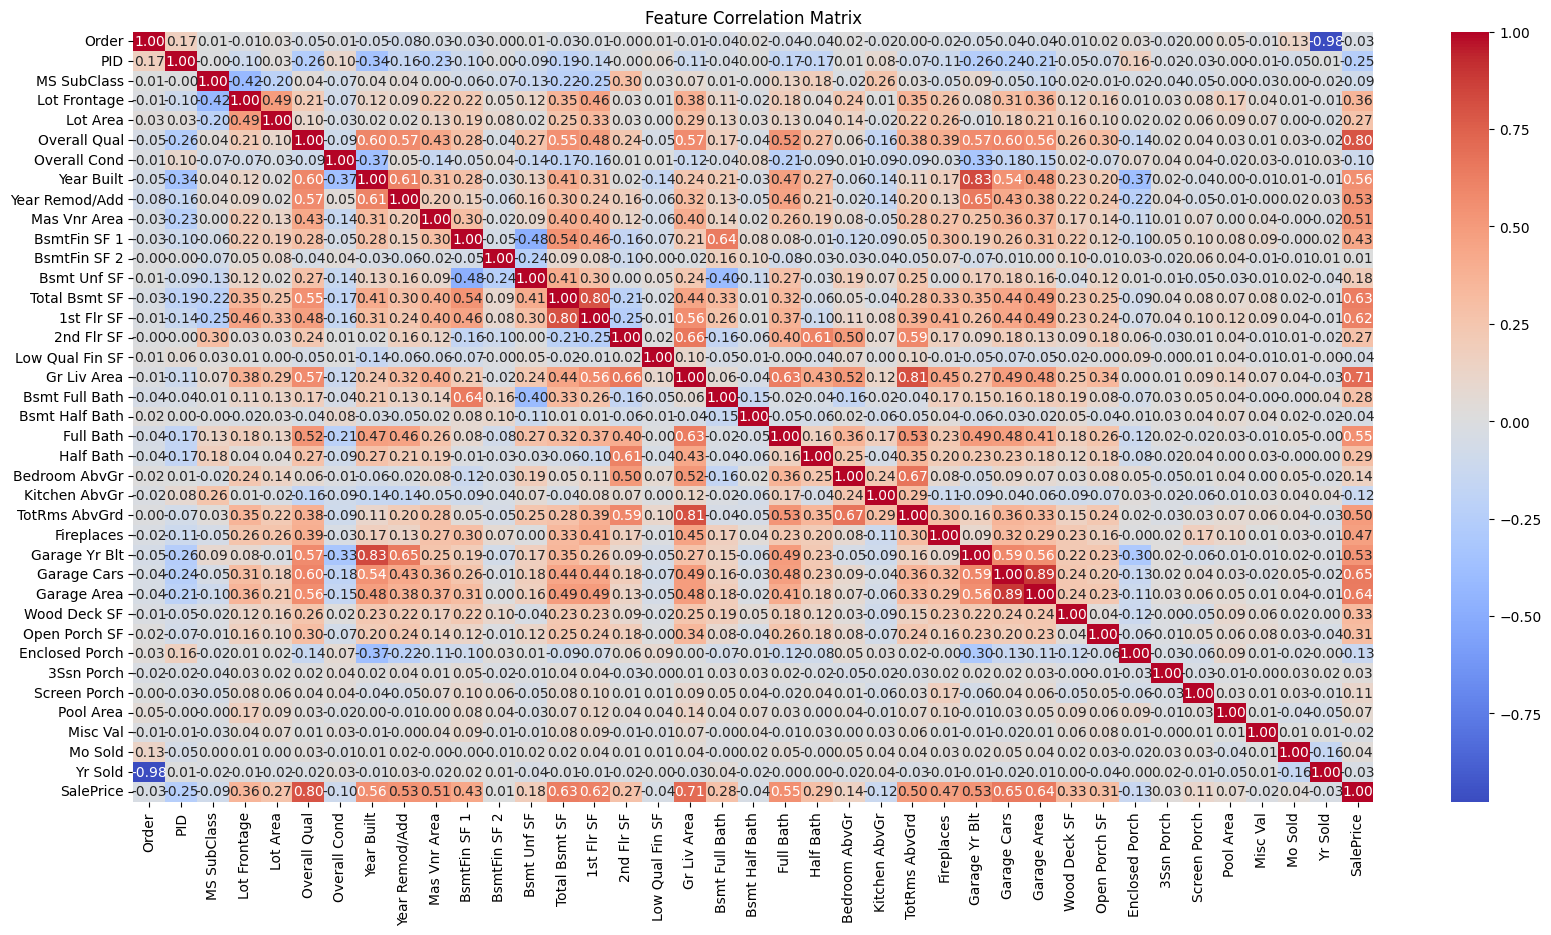

In [6]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
corr_target = corr['SalePrice'].sort_values(ascending=True)
print(corr_target)

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

In [8]:
corr_abs = corr_target.abs()
strong_features = corr_abs[corr_abs >= 0.3].index

print(strong_features, len(strong_features), len(corr_abs))

Index(['Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'BsmtFin SF 1',
       'Fireplaces', 'TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt',
       'Year Remod/Add', 'Full Bath', 'Year Built', '1st Flr SF',
       'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object') 18 39


In [9]:
print(dataset.shape)
dataset = dataset[strong_features]
print(dataset.shape)
print(dataset.head)

(2930, 82)
(2930, 18)
<bound method NDFrame.head of       Open Porch SF  Wood Deck SF  Lot Frontage  BsmtFin SF 1  Fireplaces  \
0                62           210         141.0         639.0           2   
1                 0           140          80.0         468.0           0   
2                36           393          81.0         923.0           0   
3                 0             0          93.0        1065.0           2   
4                34           212          74.0         791.0           1   
...             ...           ...           ...           ...         ...   
2925              0           120          37.0         819.0           0   
2926              0           164           NaN         301.0           0   
2927             32            80          62.0         337.0           0   
2928             38           240          77.0        1071.0           1   
2929             48           190          74.0         758.0           1   

      TotRms AbvGrd  Ma

In [10]:
# Check nulls (if you have a custom function)
check_nulls(dataset)

# Define columns with numerical (regression) NaNs and categorical (class) NaNs
nan_reg_columns = ['Lot Frontage', 'BsmtFin SF 1', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Garage Cars']
nan_class_columns = ['Garage Yr Blt']

# Fill numerical columns with their mean
dataset[nan_reg_columns] = dataset[nan_reg_columns].fillna(dataset[nan_reg_columns].mean())

# Fill categorical columns with their mode (most frequent value)
dataset[nan_class_columns] = dataset[nan_class_columns].fillna(dataset[nan_class_columns].mode().iloc[0])

# Verify
print(dataset.isnull().sum())


Open Porch SF     0
Wood Deck SF      0
Lot Frontage      0
BsmtFin SF 1      0
Fireplaces        0
TotRms AbvGrd     0
Mas Vnr Area      0
Garage Yr Blt     0
Year Remod/Add    0
Full Bath         0
Year Built        0
1st Flr SF        0
Total Bsmt SF     0
Garage Area       0
Garage Cars       0
Gr Liv Area       0
Overall Qual      0
SalePrice         0
dtype: int64


In [11]:
check_nulls(dataset)


,Open Porch SF,Wood Deck SF,Lot Frontage,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Null_Sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
dataset = st.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.214409,0.920121,3.366911e+00,0.431171,2.162180,0.354167,0.056639,-0.766540,-1.163488,-1.024793,-0.375537,1.267003,0.064444,0.256684,0.306699,0.309265,-0.067254,0.428229
1,-0.704493,0.366061,5.054634e-01,0.055706,-0.925143,-0.917535,-0.571242,-0.727412,-1.115542,-1.024793,-0.342468,-0.672643,-0.385081,1.196337,-1.008560,-1.194427,-0.776079,-0.948957
2,-0.170937,2.368594,5.523723e-01,1.054750,-0.925143,-0.281684,0.034215,-0.844796,-1.259380,-1.024793,-0.441674,0.432445,0.629756,-0.748092,-1.008560,-0.337718,-0.067254,-0.110125
3,-0.704493,-0.742060,1.115280e+00,1.366540,2.162180,0.990018,-0.571242,-0.453514,-0.779919,0.784028,-0.110988,2.425687,2.402884,0.228774,0.306699,1.207523,0.641571,0.791305
4,-0.200579,0.935952,2.240096e-01,0.764917,0.618518,-0.281684,-0.571242,0.681206,0.658466,0.784028,0.848000,-0.590974,-0.280646,0.042704,0.306699,0.255844,-0.776079,0.113980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.704493,0.207758,-1.511622e+00,0.826397,-0.925143,-0.281684,-0.571242,0.172538,-0.012780,-1.024793,0.418109,-0.399561,-0.110371,0.535789,0.306699,-0.982723,-0.067254,-0.479462
2926,-0.704493,0.556024,-1.479287e-16,-0.310976,-0.925143,-0.917535,-0.571242,0.133410,-0.060726,-1.024793,0.385040,-0.657330,-0.425947,0.052008,0.306699,-1.182556,-0.776079,-0.623440
2927,-0.230221,-0.108848,-3.388981e-01,-0.231931,-0.925143,-0.281684,-0.571242,0.994232,0.370789,-1.024793,0.682657,-0.483783,-0.316971,-2.199436,-2.323818,-1.048015,-0.776079,-0.610920
2928,-0.141295,1.157576,3.647365e-01,1.379714,0.618518,-0.281684,-0.571242,-0.179616,-0.444296,-1.024793,0.087423,0.585575,0.765976,-0.255007,0.306699,-0.219006,-0.776079,-0.135165


In [ ]:
#Save the preprocessed Data
dataset.to_csv(f'{save_path}/AmesHousing.csv')

In [14]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # After predicting:
# # y_pred = model.predict(X_test)

# # === 1. Predicted vs Actual values ===
# plt.figure(figsize=(6,6))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.title(f"{name} - Predicted vs Actual")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.grid(True)
# plt.show()

# # === 2. Residuals plot ===
# residuals = y_test - y_pred
# plt.figure(figsize=(6,4))
# sns.histplot(residuals, kde=True, bins=30)
# plt.title(f"{name} - Residuals Distribution")
# plt.xlabel("Residuals (y_true - y_pred)")
# plt.ylabel("Count")
# plt.show()


In [15]:
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     if 'Regressor' in name:
#         # regression plots
#         plt.figure(figsize=(6,6))
#         sns.scatterplot(x=y_test, y=y_pred)
#         plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
#         plt.title(f"{name} - Predicted vs Actual")
#         plt.show()
#     else:
#         # classification plots
#         cm = confusion_matrix(y_test, y_pred)
#         ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
#         plt.title(f"{name} - Confusion Matrix")
#         plt.show()
